MNIST Dataset contains around 70,000 images of handwritten digits. The digits in those images are from 0 to 9 and each corresponding image is of 28 * 28 pixels

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

### Loading the Dataset

In [2]:
(X_train, y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
print(X_test[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 19

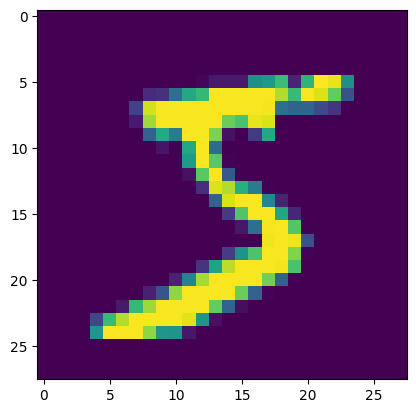

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

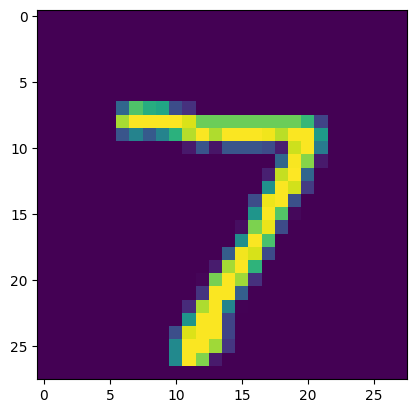

In [8]:
plt.imshow(X_test[0])

### so here we will divide our datasets by 255 to bring the pixel values in a similar range this would help the weights to adjust easily

In [9]:
X_train =X_train / 255
X_test = X_test / 255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Model Building

In [12]:
model = Sequential()

# first of all flatten the pixels in 1D

model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation = "softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.compile(loss="sparse_categorical_crossentropy",optimizer = "Adam", metrics="accuracy")

In [15]:
model.fit(X_train,y_train, epochs = 25, validation_split = 0.2)

Epoch 1/25
1500/1500 [==============================] - 11s 5ms/step - loss: 0.2851 - accuracy: 0.9177 - val_loss: 0.1567 - val_accuracy: 0.9556
Epoch 2/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1296 - accuracy: 0.9625 - val_loss: 0.1177 - val_accuracy: 0.9662
Epoch 3/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0888 - accuracy: 0.9740 - val_loss: 0.1046 - val_accuracy: 0.9691
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0654 - accuracy: 0.9806 - val_loss: 0.0876 - val_accuracy: 0.9745
Epoch 5/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0490 - accuracy: 0.9851 - val_loss: 0.0875 - val_accuracy: 0.9753
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0384 - accuracy: 0.9885 - val_loss: 0.0926 - val_accuracy: 0.9729
Epoch 7/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0308 - accuracy: 0.9907 - val_loss: 0.0886 - val_accuracy

In [16]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [17]:
y_prob

array([[1.07993940e-10, 7.78791897e-16, 4.66851141e-11, ...,
        1.00000000e+00, 5.41737100e-09, 1.07757581e-09],
       [1.04829888e-15, 2.39076897e-10, 1.00000000e+00, ...,
        2.51432851e-28, 4.50420993e-15, 6.11670440e-23],
       [6.06475590e-14, 9.99992013e-01, 2.00811474e-08, ...,
        6.93459651e-06, 9.07275876e-07, 2.73304185e-10],
       ...,
       [7.12627437e-27, 2.71376722e-28, 1.85951059e-27, ...,
        5.06800459e-16, 5.06391699e-20, 5.22318679e-13],
       [1.19061481e-21, 2.28914450e-23, 1.13677285e-29, ...,
        2.00752974e-19, 1.17331278e-09, 8.20543452e-24],
       [3.65119475e-17, 2.32364565e-27, 6.02627494e-19, ...,
        1.20928263e-26, 1.34636962e-17, 8.56659725e-27]], dtype=float32)

In [18]:
y_pred = y_prob.argmax(axis=1)

In [19]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [20]:
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_test, y_pred))

0.9781
